In [1]:
import operator
import unittest

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

from graphs import datasets
from measure.distance import *
from measure.kernel import *
from measure.kernel_new import *
from measure.shortcuts import *
from scorer import rand_index

from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.cluster.hierarchy import fcluster, ward
from scipy.linalg import sqrtm
from ward import Ward
from scipy.cluster._hierarchy import nn_chain

In [2]:
d3_category20 = [
    '#aec7e8',
    '#1f77b4',
    '#ffbb78',
    '#ff7f0e',
    '#98df8a',
    '#2ca02c',
    '#ff9896',
    '#d62728',
    '#c5b0d5',
    '#9467bd',
    '#c49c94',
    '#8c564b',
    '#7f7f7f',
    
    '#aec7e8',
    '#1f77b4',
    '#ffbb78',
    '#ff7f0e',
    '#98df8a',
    '#2ca02c',
    '#ff9896',
    '#d62728',
    '#c5b0d5',
    '#9467bd',
    '#c49c94',
    '#8c564b',
    '#7f7f7f',
] 

In [3]:
def linspace(start, end, count):
    count -= 4
    grid = list(np.linspace(start, end, count))
    step = (end - start) / (count - 1)
    grid.extend([0.1 * step, 0.5 * step, end - 0.1 * step, end - 0.5 * step])
    return grid

A Jupyter Widget

/Users/illusionww/Documents/GitHub/py_graphs/measure/kernel_new.py:45: RuntimeWarning: divide by zero encountered in log
  return np.log(K)


Error in Katz 0.0	| 'NoneType' object has no attribute 'nodes'


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/illusionww/Documents/GitHub/py_graphs/measure/kernel_new.py:45: RuntimeWarning: invalid value encountered in log
  return np.log(K)


Error in Katz 1.0	| 'NoneType' object has no attribute 'nodes'

DONE: Katz	param: 0.22 score: 0.7183469631697055




A Jupyter Widget

/Users/illusionww/Documents/GitHub/py_graphs/measure/kernel_new.py:54: RuntimeWarning: divide by zero encountered in log
  return np.log(K)


Error in Estrada 0.0	| 'NoneType' object has no attribute 'nodes'


/Users/illusionww/Documents/GitHub/py_graphs/measure/scaler.py:42: RuntimeWarning: divide by zero encountered in double_scalars
  yield 0.5 * t / (1.0 - t)
/Users/illusionww/Documents/GitHub/py_graphs/measure/kernel_new.py:53: RuntimeWarning: invalid value encountered in multiply
  K = KernelNew.mat_exp(t * self.A)


Error in Estrada 1.0	| 'NoneType' object has no attribute 'nodes'

DONE: Estrada	param: 0.22 score: 0.7183469631697055




A Jupyter Widget

/Users/illusionww/Documents/GitHub/py_graphs/measure/kernel_new.py:68: RuntimeWarning: divide by zero encountered in log
  return np.log(K)


Error in Heat 0.0	| 'NoneType' object has no attribute 'nodes'
0.690476190476 K < 0
Error in Heat 0.58	| 'NoneType' object has no attribute 'shape'
0.75 K < 0
Error in Heat 0.6	| 'NoneType' object has no attribute 'shape'
0.815789473684 K < 0
Error in Heat 0.62	| 'NoneType' object has no attribute 'shape'
0.888888888889 K < 0
Error in Heat 0.64	| 'NoneType' object has no attribute 'shape'
0.970588235294 K < 0
Error in Heat 0.66	| 'NoneType' object has no attribute 'shape'
1.0625 K < 0
Error in Heat 0.68	| 'NoneType' object has no attribute 'shape'
1.16666666667 K < 0
Error in Heat 0.7000000000000001	| 'NoneType' object has no attribute 'shape'
1.28571428571 K < 0
Error in Heat 0.72	| 'NoneType' object has no attribute 'shape'
1.42307692308 K < 0
Error in Heat 0.74	| 'NoneType' object has no attribute 'shape'
1.58333333333 K < 0
Error in Heat 0.76	| 'NoneType' object has no attribute 'shape'
1.77272727273 K < 0
Error in Heat 0.78	| 'NoneType' object has no attribute 'shape'
2.0 K < 0
Er

/Users/illusionww/Documents/GitHub/py_graphs/measure/kernel_new.py:64: RuntimeWarning: invalid value encountered in multiply
  K = KernelNew.mat_exp(- t * self.L, n=50)
/Users/illusionww/Documents/GitHub/py_graphs/measure/kernel_new.py:65: RuntimeWarning: invalid value encountered in less
  if np.any(K < 0):


Error in Heat 1.0	| 'NoneType' object has no attribute 'nodes'
249.49999999999977 K < 0
Error in Heat 0.998	| 'NoneType' object has no attribute 'shape'
49.49999999999996 K < 0
Error in Heat 0.99	| 'NoneType' object has no attribute 'shape'

DONE: Heat	param: 0.46 score: 0.6753658997646265




A Jupyter Widget

Error in NormalizedHeat 0.0	| 'NoneType' object has no attribute 'nodes'

/Users/illusionww/Documents/GitHub/py_graphs/measure/kernel_new.py:84: RuntimeWarning: divide by zero encountered in log
  return np.log(K)


KeyboardInterrupt: 

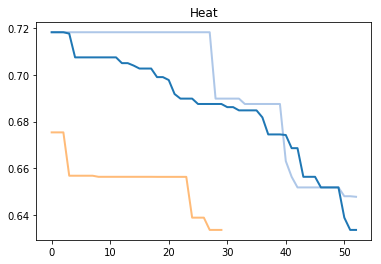

In [4]:
kbward_data = {}
graphs, info = datasets.polbooks
for m_num, measure in enumerate([
            Katz, Estrada, Heat,
            NormalizedHeat,
            RegularizedLaplacian,
            PersonalizedPageRank,
            ModifiedPersonalizedPageRank,
            HeatPersonalizedPareRank
        ]):
    measureparamdict = {}
    for param in tqdm_notebook(linspace(0, 1, 55), desc=measure.__name__):
        mean = []
        for edges, nodes in graphs:
            try:
                D = measure(edges).getK(list(measure(edges).scaler.scale([param]))[0])
                n_clusters=len(list(set(nodes)))
                y_pred = Ward().predict(D, n_clusters)
                ri = adjusted_rand_score(nodes, y_pred)
                mean.append(ri)
            except KeyboardInterrupt:
                raise KeyboardInterrupt()
            except Exception as e:
                print('Error in {} {}\t| {}'.format(measure.__name__, param, e))
            except np.linalg.linalg.LinAlgError as err:
                print('Suka blyat')
        mean = [m for m in mean if m is not None and m == m]
        score = np.array(mean).mean()
        if score is not None and score == score:
            measureparamdict[param] = score
    
    if len(list(measureparamdict.items())) > 0:
        maxparam = max(measureparamdict.items(), key=operator.itemgetter(1))[0]
        print("DONE: {}\tparam: {} score: {}\n\n".format(measure.__name__, maxparam, measureparamdict[maxparam]))
        measureparamdict = np.array(sorted(measureparamdict.items(), key=operator.itemgetter(0)))
        kbward_data[measure.__name__] = measureparamdict
        plt.plot(range(measureparamdict.shape[0]), sorted(measureparamdict[:, 1])[::-1], color=d3_category20[m_num], label=measure.__name__, linewidth=2)
        plt.title(measure.__name__)
#         plt.show()
    else:
        print("DONE: {}\tfailed\n\n".format(measure.__name__))

plt.xlim(0, 55)
plt.ylim(.58, .73)
plt.title('python ARI')
plt.legend()